In [1]:
import configparser
import logging

import pandas as pd

import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/vtensor/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
config = configparser.ConfigParser()                                            
config.read('config.ini')                                                       

['config.ini']

In [3]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [4]:
pylab.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams.update({'font.size': 14})

In [5]:
from eval_tensor import consistent_name_d

In [6]:
df = pd.read_pickle(config['DEFAULT']['ProjectDirectory']+'dataframe/assoc.pkl')

In [7]:
df = df.sample(frac=.01)

In [8]:
#df.rename(columns=consistent_name_d, inplace=True)

In [9]:
df.columns

Index(['freq', 'freq_nsubj', 'freq_ROOT', 'freq_dobj',
       'freq_('nsubj', 'ROOT')', 'freq_('nsubj', 'dobj')',
       'freq_('ROOT', 'dobj')', 'log_prob_freq_nsubj', 'log_prob_freq_ROOT',
       'log_prob_freq_dobj', 'log_prob_freq_('nsubj', 'ROOT')',
       'log_prob_freq_('nsubj', 'dobj')', 'log_prob_freq_('ROOT', 'dobj')',
       'log_freq', 'log_prob', 'pmi', 'iact', 'npmi', 'niact', 'pmi_sali',
       'iact_sali', 'ldice', 'ldice_sali'],
      dtype='object')

# Histograms of $log(p)$ and the two PMIs values

In [10]:
def hist_and_save(log_prob, log=True):
    plt.hist(df[log_prob], bins=100, log=log)
    plt.title('Histogram of {}'.format(log_prob).replace('_', '-'))
    plt.savefig('/home/makrai/repo/paper/Coling2020/verbtensor/img/hist_{}.png'.format(log_prob))

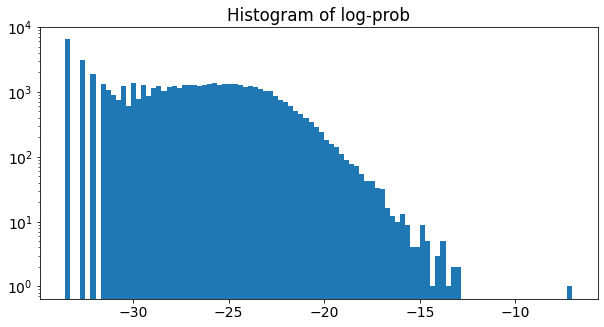

In [11]:
hist_and_save('log_prob')

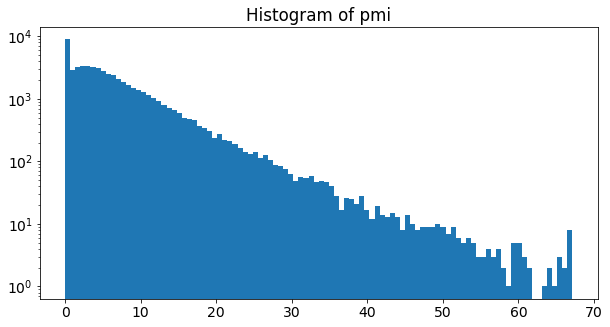

In [12]:
hist_and_save('pmi')#, log=False)

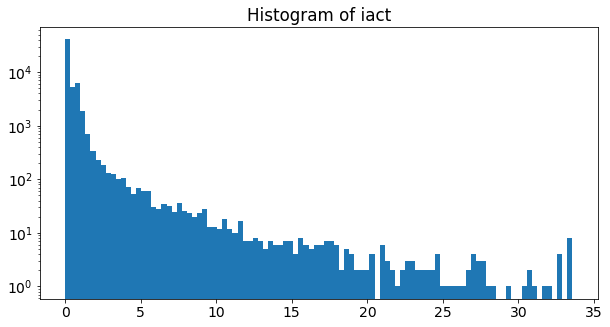

In [13]:
hist_and_save('iact')

# PMI is is biased towards rare events

In [14]:
def plot_against_prob(pmi_vanl):
    plt.scatter(df.log_prob, df[pmi_vanl], s=1)
    plt.title('{} plotted against $\\log(p)$'.format(pmi_vanl).replace('_', '-'))
    plt.savefig('/home/makrai/repo/paper/Coling2020/verbtensor/img/rare_{}.png'.format(pmi_vanl))

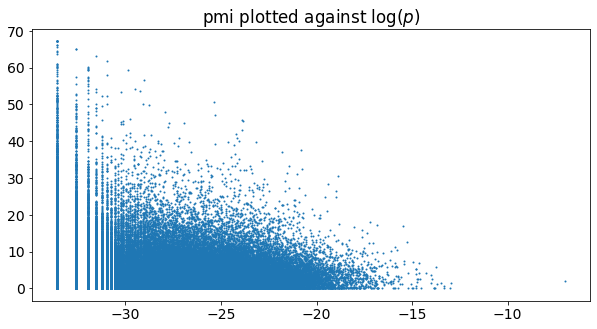

In [15]:
plot_against_prob('pmi')

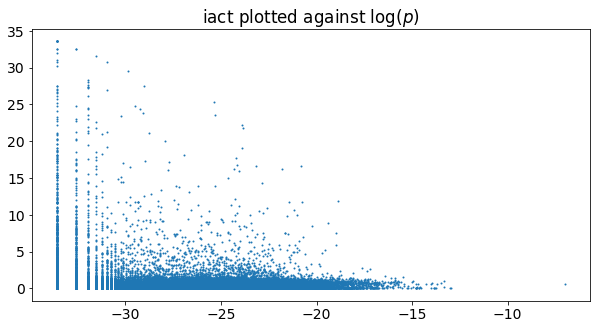

In [16]:
plot_against_prob('iact')

# Salience: `*=` $\log(p)$

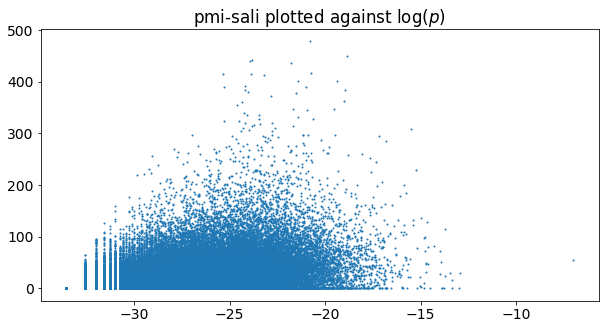

In [17]:
plot_against_prob('pmi_sali')

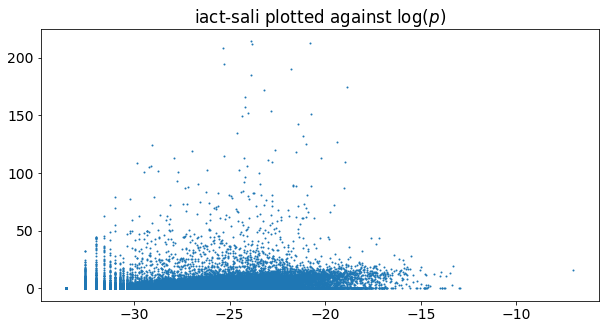

In [18]:
plot_against_prob('iact_sali')

# Normalized PMI

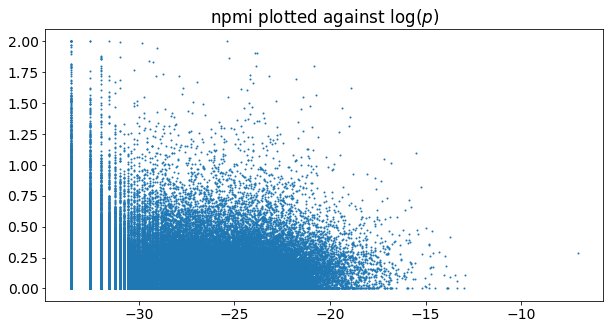

In [19]:
plot_against_prob('npmi')

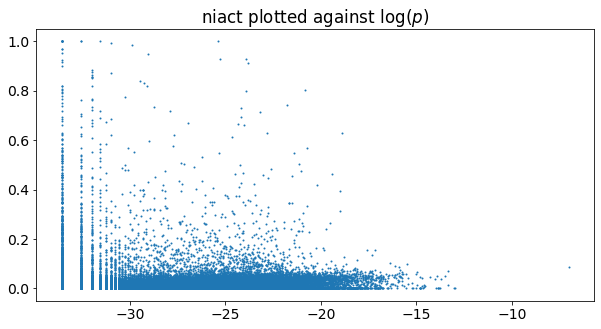

In [20]:
plot_against_prob('niact')

# Normalized vs salience

In [21]:
def plot_norm_vs_sali(pmi):
    plt.scatter(df['{}_sali'.format(pmi)], df['n{}'.format(pmi)], s=2, c=df['{}'.format(pmi)])
    plt.title('Salienced and normalized {} compared'.format(pmi))
    plt.savefig('/home/makrai/repo/paper/Coling2020/verbtensor/img/sali_vs_norm_{}.png'.format(pmi))

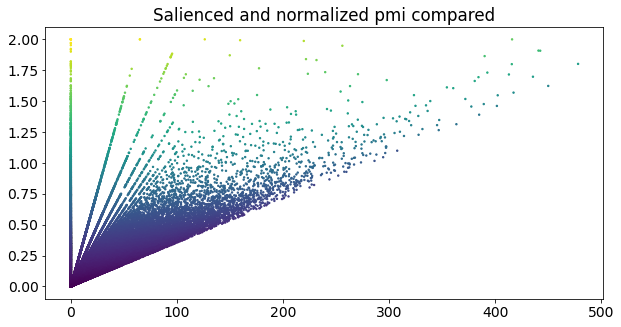

In [22]:
plot_norm_vs_sali('pmi')

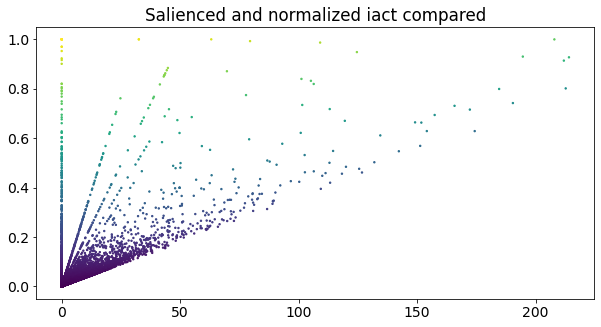

In [23]:
plot_norm_vs_sali('iact')

# $\log$-histograms

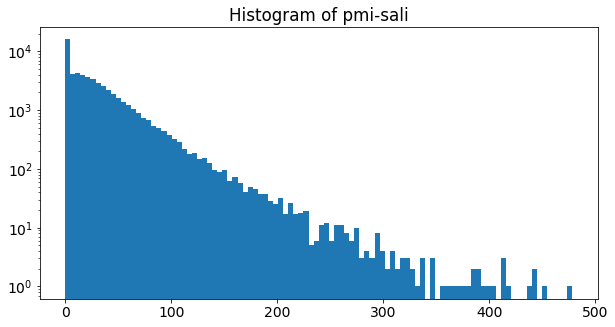

In [24]:
hist_and_save('pmi_sali')

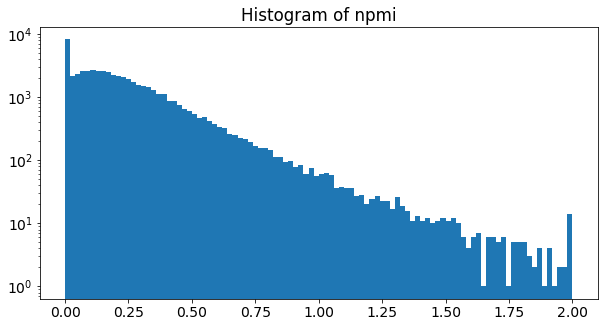

In [25]:
hist_and_save('npmi')

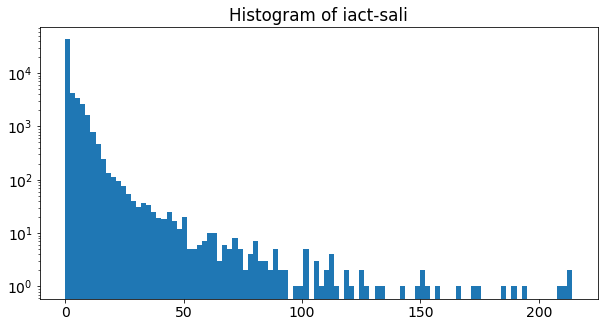

In [26]:
hist_and_save('iact_sali')

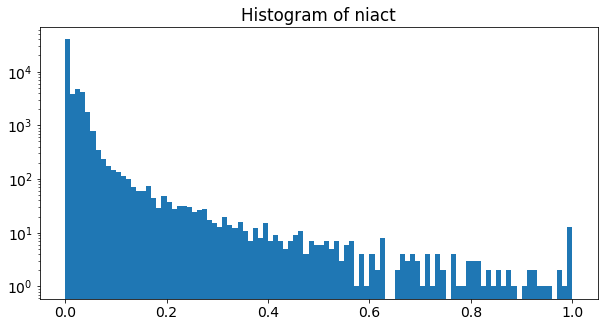

In [27]:
hist_and_save('niact')